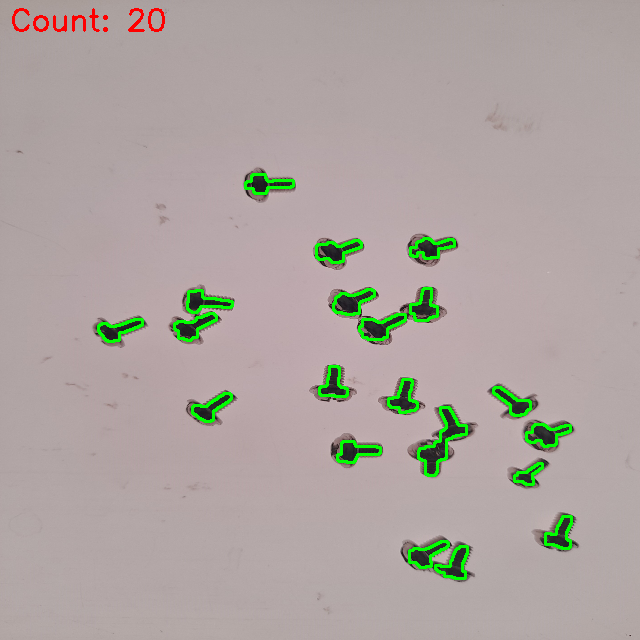

Number of objects detected: 20


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def resize_image(image, target_size=(640, 640)):
    return cv2.resize(image, target_size)

# Load the image
image_path = '/content/20240713_192951.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Resize the image to 640x640
    resized_image = resize_image(image, (640, 640))

    # Convert to grayscale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)

    # Apply binary thresholding
    _, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY_INV)

    # Apply morphological operations to remove noise and separate objects better
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel, iterations=2)

    # Find contours on the morphological image
    contours, _ = cv2.findContours(morph.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the resized image
    cv2.drawContours(resized_image, contours, -1, (0, 255, 0), 2)

    # Count objects
    object_count = len(contours)

    # Put the count text on the image
    cv2.putText(resized_image, f'Count: {object_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the result
    cv2_imshow(resized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    print(f'Number of objects detected: {object_count}')


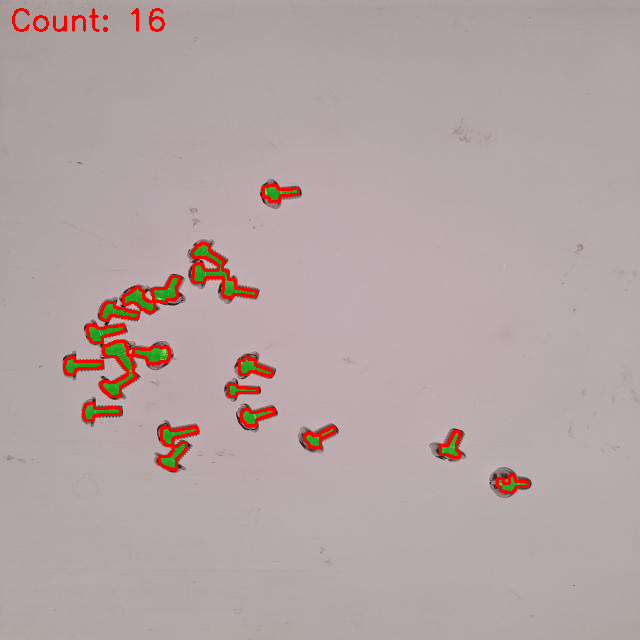

Number of objects detected: 16


In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def resize_image(image, target_size=(640, 640)):
    return cv2.resize(image, target_size)

def create_mask(image, contour):
    mask = np.zeros(image.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [contour], -1, 255, -1)
    return mask

# Load the image
image_path = '/content/20240713_193135_jpg.rf.02837d872fff76a08c664eb2e3f42b8f.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image at {image_path}")
else:
    # Resize the image to 640x640
    resized_image = resize_image(image, (640, 640))

    # Convert to grayscale
    gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply binary thresholding
    _, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY_INV)

    # Apply morphological operations to remove noise and separate objects better
    kernel = np.ones((3, 3), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)
    morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel, iterations=2)

    # Find contours on the morphological image
    contours, _ = cv2.findContours(morph.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Count objects
    object_count = len(contours)

    # Draw contours and overlay masks on the original image
    mask_overlay = resized_image.copy()
    for contour in contours:
        mask = create_mask(resized_image, contour)
        colored_mask = np.zeros_like(resized_image)
        colored_mask[mask == 255] = (0, 255, 0)  # Green mask for visualization
        mask_overlay = cv2.addWeighted(mask_overlay, 1, colored_mask, 0.5, 0)
        cv2.drawContours(mask_overlay, [contour], -1, (0, 0, 255), 2)  # Red contour

    # Put the count text on the image
    cv2.putText(mask_overlay, f'Count: {object_count}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the result
    cv2_imshow(mask_overlay)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    print(f'Number of objects detected: {object_count}')